<b>1. Team Name: </b>AI-Driven Augmented Reality for Biology Education: <b>xFrog</b></br>
<b>2. Team Members: </b>Faith Abang, Paul Alvarado, Javier Sayles, Zachary Guccione

<b>3. Executive Summary of Project</b></br>
We proposes using textual analysis of customer reviews to uncover actionable insights. By categorizing reviews into dimensions like "food quality," "service," and "ambiance," the solution helps restaurants pinpoint areas for improvement, optimize operations, and enhance customer satisfaction. Leveraging sentiment analysis and word-matching with datasets like Yelp, the approach provides sub-rankings and visualizations to track performance over time, driving profits, customer loyalty, and data-driven growth. </br> </br>
Many restaurants focus on overall review scores, overlooking valuable insights in customer feedback. By analyzing reviews and categorizing them into areas like ‘customer satisfaction,’ ‘food quality,’ and ‘ambiance,’ actionable insights can be uncovered. These insights help identify areas for improvement, enhancing customer experiences and boosting business performance.</br></br>
We propose using sentiment analysis and word-matching techniques to categorize review content into subcategories (e.g., “waiter” → service, “cheeseburger” → food). This will generate sub-rankings and visualizations to track subcategory performance over time for a specific restaurant. The solution provides valuable insights to boost profits through improved customer experiences and targeted optimizations. By addressing pain points and building on strengths, restaurants can enhance satisfaction, foster loyalty, and encourage repeat business. Additionally, these insights enable efficient resource allocation and strategic improvements for long-term success.</br></br>
<b>Extra Context</b></br>
Extracting the feature (ambiance, food, service) areas will come from the New Orleans data and those feature words will be applied to the Nashville restaurant data.

<b>4. Data Sources</b></br>
Yelp dataset - https://www.yelp.com/dataset 
</br>

<b>External Data Sources</b></br>
SQL Table Creation - https://github.com/veeragandhi/YelpDatasetSQLServer/blob/master/1_ImportYelpDataset.sql
</br>Description: This Github repository allowed for us to easily import the json files into a SQL Server database, in which we could select the attributes we will be using much quicker than loading the large file into Python.
</br>

<b>Filtering/Selection Critera</b></br>
Using the SQL table creation github repository above, We hosted a local database to query the data to select the specific cities and timeframes we planned to operate on. We will solely be using data from the review.json file and the business.json files. Our criteria were as followed:
* Restaurants in New Orleans or Nashville
* The review had to have been before 2020-01-01
* The restaurants has to be still open

Below is the query used on the review and business dataset:
```
select *
	from dbo.Review r
	join dbo.Business b 
	on r.business_id = b.business_id
	where b.business_city in ('New Orleans', 'Nashville')
	and r.review_date >= Convert(datetime, '2020-01-01')
	and b.is_open = 1
	order by review_count desc;
```
</br>
Using the Python code below, we will also be applying some filtering. We will be removing fast food restaurants, as well as creating a threshold for an amount of reviews per restaurant.

* Non-food establishments will be removed
* Fast-food establishments will be removed
* Resturants that have >5 locations will be removed
* Resturants with <15 reviews will be removed
</br></br>

<b>Module and Data Imports</b>

In [4]:
!pip install s3fs==2023.9.2
!pip install nltk
!pip install spacy
!pip install wordcloud
!pip install seaborn
!python -m spacy download en_core_web_sm
!pip install transformers

  Using cached s3fs-2023.9.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached aiobotocore-2.5.4-py3-none-any.whl.metadata (19 kB)
  Using cached fsspec-2023.9.2-py3-none-any.whl.metadata (6.7 kB)
  Using cached botocore-1.31.17-py3-none-any.whl.metadata (5.9 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached urllib3-1.26.20-py2.py3-none-any.whl.metadata (50 kB)
Using cached s3fs-2023.9.2-py3-none-any.whl (28 kB)
Using cached fsspec-2023.9.2-py3-none-any.whl (173 kB)
Using cached aiobotocore-2.5.4-py3-none-any.whl (73 kB)
Using cached botocore-1.31.17-py3-none-any.whl (11.1 MB)
Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
Using cached urllib3-1.26.20-py2.py3-none-any.whl (144 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires libclang>=13.0.0, which is not installed.
tensorflow 2.10.0 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.
tensorboard 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
torch 2.5.1 requires sympy==1.13.1, but you have sympy 1.13.2 which is incompatible.


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 20.1 MB/s eta 0:00:00
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.15.1-py3-none-any.whl.metadata (15 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached cloudpathlib-0.20.0-py3-none-any.w

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires libclang>=13.0.0, which is not installed.
tensorflow 2.10.0 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
torch 2.5.1 requires sympy==1.13.1, but you have sympy 1.13.2 which is incompatible.


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----------------- ---------------------- 5.5/12.8 MB 33.6 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 34.3 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 30.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Using cached transformers-4.48.3-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.28.1-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.2-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
Using cached transformers-4.48.3-py3-none-any.whl (9.7 MB)
Using cached huggingface_hub-0.28.1-py3-none-any.whl (464 kB)
Using cached safetensors-0.5.2-cp38-abi3-win_amd64.whl (303 kB)
Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl (2.4 MB)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import s3fs
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import spacy
from transformers import pipeline
import torch
import os
import json
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")

c:\Users\zachg\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zachg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [7]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")


CUDA Available: True
GPU Name: NVIDIA GeForce RTX 4060


In [10]:
# file path within our S3 bucket
# file = 's3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/58v8yaokwbk5rb/dev/yelp_data_nola_nashville.csv'

# read our dataframe and set the correct column names
# df = pd.read_csv(file)
df = pd.read_csv('yelp_data_nola_nashville.csv')
cols = ['review_id','user_id','business_id','stars','review_date','review_text','is_useful','is_funny','is_cool','business_id_2','business_name','neighborhood','business_address','business_city','business_state','postal_code','latitude','longitude','stars','review_count','is_open','attributes','categories','business_hours','item_type']
df.columns = cols

In [11]:
df.head()

,review_id,user_id,business_id,stars,review_date,review_text,is_useful,is_funny,is_cool,business_id_2,...,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,business_hours,item_type
0,GK1bfroIRzvaJmgpw7pN1w,f9IKEjKCNZ_l8AqA5H0Xmg,_ab50qdWOk0DdB6XOrBitw,4,2020-01-18,The oysters here were amazing. The raw oysters...,0,0,0,_ab50qdWOk0DdB6XOrBitw,...,70130.0,29.954273,-90.068965,4.0,7568,1,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",NaN,"{""Monday"":""11:0-22:0"",""Thursday"":""11:0-22:0"",""...",NaN
1,sTCQyC23q3MOnIbwlDVJOA,bq7lX3c3fsFjUmVzVhgELw,_ab50qdWOk0DdB6XOrBitw,5,2020-01-04,Char broiled oysters are the bomb! My boyfrien...,0,0,0,_ab50qdWOk0DdB6XOrBitw,...,70130.0,29.954273,-90.068965,4.0,7568,1,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",NaN,"{""Monday"":""11:0-22:0"",""Thursday"":""11:0-22:0"",""...",NaN
2,dEs0C2lX9roZ1QJPZKzo3w,Id_VrcgaxwbG6t_upjGZ3Q,_ab50qdWOk0DdB6XOrBitw,4,2020-01-24,"The charbroiled oysters were delicious, cheese...",0,0,0,_ab50qdWOk0DdB6XOrBitw,...,70130.0,29.954273,-90.068965,4.0,7568,1,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",NaN,"{""Monday"":""11:0-22:0"",""Thursday"":""11:0-22:0"",""...",NaN
3,mJ7MVIupB_9crKH8X6ZpCw,pPr5MRSj8QiB2F2vg_QsAA,_ab50qdWOk0DdB6XOrBitw,5,2020-01-05,We came a few minutes after it opened so we di...,0,0,0,_ab50qdWOk0DdB6XOrBitw,...,70130.0,29.954273,-90.068965,4.0,7568,1,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",NaN,"{""Monday"":""11:0-22:0"",""Thursday"":""11:0-22:0"",""...",NaN
4,gzTRxRcZwQsK17-89-kyig,z0qnaHebiScP798mdfLNEA,_ab50qdWOk0DdB6XOrBitw,5,2020-01-25,Im not a fan of seafood lets just say that. Bu...,0,0,0,_ab50qdWOk0DdB6XOrBitw,...,70130.0,29.954273,-90.068965,4.0,7568,1,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",NaN,"{""Monday"":""11:0-22:0"",""Thursday"":""11:0-22:0"",""...",NaN


<b>Continuing Filter</b>

In [11]:
# there are only a few columns that we are going to need, the rest we can get rid of.
useful_cols = ['business_id','user_id','business_name','review_date','review_text','business_city','attributes']
df = df[useful_cols]
df.head()

,business_id,user_id,business_name,review_date,review_text,business_city,attributes
0,_ab50qdWOk0DdB6XOrBitw,f9IKEjKCNZ_l8AqA5H0Xmg,Acme Oyster House,2020-01-18,The oysters here were amazing. The raw oysters...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."
1,_ab50qdWOk0DdB6XOrBitw,bq7lX3c3fsFjUmVzVhgELw,Acme Oyster House,2020-01-04,Char broiled oysters are the bomb! My boyfrien...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."
2,_ab50qdWOk0DdB6XOrBitw,Id_VrcgaxwbG6t_upjGZ3Q,Acme Oyster House,2020-01-24,"The charbroiled oysters were delicious, cheese...",New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."
3,_ab50qdWOk0DdB6XOrBitw,pPr5MRSj8QiB2F2vg_QsAA,Acme Oyster House,2020-01-05,We came a few minutes after it opened so we di...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."
4,_ab50qdWOk0DdB6XOrBitw,z0qnaHebiScP798mdfLNEA,Acme Oyster House,2020-01-25,Im not a fan of seafood lets just say that. Bu...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."


In [7]:
# let's now use the attributes column to only select the restaurants
df = df[df["attributes"].str.contains("restaurant", case=False, na=False)]

In [8]:
# lets create a list of all the fast food restaurants.
file_business = 's3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/58v8yaokwbk5rb/dev/yelp_academic_dataset_business.json'
df_bus = pd.read_json(file_business, lines=True)

In [9]:
# lets create a list of all the locations that appear >5 times (this will remove fast food as well).
name_counts = df_bus["name"].value_counts()
name_list = name_counts[name_counts > 5].index.tolist()

# now we can apply this list to remove when they appear within the dataframe
df = df[~df["business_name"].isin(name_list)]

In [10]:
# we will now filter the businesses that have more than 15 reviews
business_counts = df["business_name"].value_counts()
frequent_businesses = business_counts[business_counts > 15].index.tolist()

# Filter DataFrame to keep only those businesses
df = df[df["business_name"].isin(frequent_businesses)]

<b>5. Summary Statistics of the Data</b>

In [35]:
# A: Number of reviews
num_reviews = df.shape[0]
print(f"Total Number of Reviews: {num_reviews}")

Total Number of Reviews: 114560


In [36]:
# B: Number of tokens
def count_tokens_simple(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    text_data = df[column_name].dropna()
    total_tokens = sum(len(str(text).split()) for text in text_data)

    return total_tokens

tokens = count_tokens_simple(df, 'review_text')
print(f"Total number of tokens: {tokens}")

Total number of tokens: 10171514


In [37]:
# C: Number of unique words
# using a faster approach -- punctuation handling made this run for hours.
word_counts = Counter(" ".join(df["review_text"].dropna()).lower().split())
vocab_size = len(word_counts)

print(f"Size of vocabulary: {vocab_size}")

Size of vocabulary: 177010


In [39]:
# D: Average review length (i.e., average number of words of each review)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
doc_lens = [len(doc) for doc in nlp.pipe(df["review_text"].dropna(), batch_size=1000, n_process=4)]

# Compute the average word count
avg_word_count = sum(doc_lens) / len(doc_lens)

print(f"Average number of words per review: {avg_word_count}")

Average number of words per review: 103.821875


In [40]:
# E: Number of unique customers
num_unique_customers = df["user_id"].nunique()
print(f"Number of Unique Customers: {num_unique_customers}")

Number of Unique Customers: 60970


In [41]:
# F: Other key elements involved
num_unique_businesses = df["business_id"].lower().nunique()
# Number of unique cities
num_unique_cities = df["business_city"].lower().nunique()

print(f"Number of businesses: {num_unique_businesses}")
print(f"Number of businesses: {num_unique_cities}")

Number of businesses: 1819
Number of unique cities: 5


In [ ]:
# F:Preliminary Data Exploration
# This takes a while to run.
word_freq = Counter([token.text.lower() for text in df["review_text"].dropna() for token in nlp(text)])

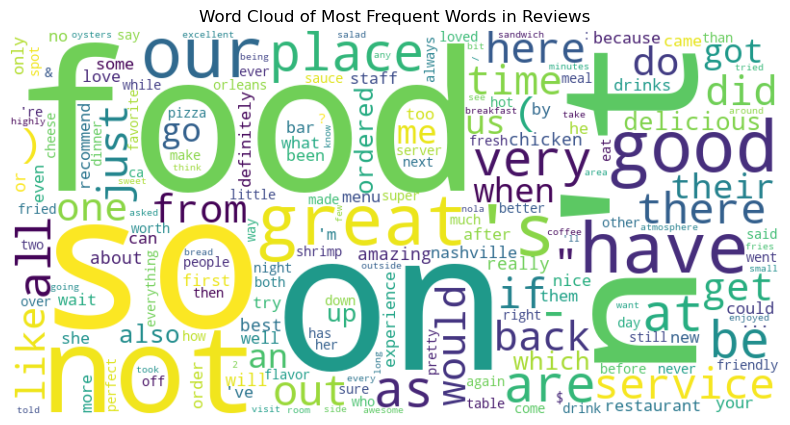

In [51]:
# Sort dictionary by frequency (highest to lowest)
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Remove the top 25 most common words
filtered_words = dict(sorted_words[25:])  # Keep only words beyond the top 25

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_words)
# Visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words in Reviews")
plt.show()

<b> 6. Data Evaluation</b> </br>
<b>A. Why the selected data (e.g., reviews/customers/business/regions) are suitable for answering your business questions? </br> </b>
The selected dataset precisely aligns with the project’s objective of extracting actionable insights for
small, independently owned restaurants. By focusing on “Mom-and-Pop” establishments in New Orleans,
LA, and Nashville, TN, the analysis captures sentiment trends unique to these businesses rather than
broader industry patterns. Owners can more directly implement changes in food quality, service, and
ambiance, making any recommendations immediately actionable. Several filtering steps ensure reliability
and relevance: non-food and fast-food venues are excluded, chain restaurants with more than five
locations are removed, and only restaurants with at least 15 reviews are retained. <br><br>

<b>B. Whether the sample size is appropriate and why?</br> </b>
Reviews are restricted to those posted before January 1st, 2020, preserving pre-pandemic dining insights and limiting
pandemic-related disruptions. This approach yields 114,561 reviews (featuring columns: business_id,
business_name, review_date, review_text, business_city, and attributes), providing a robust sample size
that balances depth and breadth. Both cities also share notable cultural and culinary elements, such as
barbecue, soul food, and comfort food, reducing linguistic drift in text analysis and strengthening the
sentiment model. Moreover, while New Orleans attracts large numbers of tourists and food enthusiasts,
Nashville’s mix of locals and visitors diversifies the dataset, enhancing model accuracy and
generalizability. <br><br>

<b>C & D. Potential biases in certain dimensions and potential challenges?</br> </b>
Despite these advantages, certain biases and challenges remain. Yelp reviewers tend to
skew younger, and individuals who post reviews often document only highly positive or negative
experiences, potentially shifting overall sentiment. Additionally, Excluding chain restaurants removes
insights from more standardized dining contexts, and limiting the timeframe to reviews prior to 2020
introduces a temporal bias that may not capture shifting expectations. Differences in local cuisines, such
as Cajun and Creole in New Orleans versus Southern comfort food in Nashville, can affect the sentiment
model, as customer expectations and dining experiences vary between the two cities. Furthermore,
sentiment analysis must handle unstructured text containing geo-specific sarcasm, slang, and ambiguous
phrasing, which may complicate the classification process. Regional dialects, inconsistent formatting, and
the potential overrepresentation of certain topics (e.g., food quality at the expense of ambiance) further
challenges accurate insights.

<b>7. Preliminary Data Exploration</b></br>
We currently only ran a few reviews through each pipeline, as running all 100,000+ reviews would take hours.

In [14]:
# The results below are one row per review.  The columns included are a confidence score on the Candidate labels that are identified below.
# If your CSV had "Unnamed: 0", rename it to "review_id"
if "Unnamed: 0" in df.columns:
    df.rename(columns={"Unnamed: 0": "review_id"}, inplace=True)
else:
    # Otherwise, create a review_id column from the index.
    df["review_id"] = df.index

# Load the zero-shot classification pipeline (e.g., BART MNLI)
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate dimensions (up to 10 dimensions)
candidate_labels = [
    "Food Quality",
    "Service",
    "Ambiance",
    "Wait Time",
    "Price/Value",
    "Menu Variety",
    "Cleanliness"
]

def classify_review_to_dict(review_text):
    """
    Classifies a review into candidate dimensions and returns a dictionary
    mapping each candidate label to its confidence score. If a label is not
    returned by the classifier, its score is set to 0.0.
    """
    result = classifier(review_text, candidate_labels, multi_label=True)
    # Build a dictionary from the classifier's results.
    # Note: result["labels"] and result["scores"] are returned in sorted order.
    score_dict = {label: score for label, score in zip(result["labels"], result["scores"])}
    # Ensure each candidate label is present; if not, set its score to 0.0.
    return {label: score_dict.get(label, 0.0) for label in candidate_labels}

# Apply the classifier to each review, creating a dictionary per review.
# df["classification_dict"] = df["review_text"].apply(classify_review_to_dict)

# Uncomment to make this run faster.  Comment the above out.
# df["classification_dict"] = df["review_text"].head().apply(classify_review_to_dict)

# Expand the dictionaries into separate columns using pd.json_normalize (or .apply(pd.Series))
classification_df = pd.json_normalize(df["classification_dict"])

# Join the classification results back to the original DataFrame.
df_final = pd.concat([df.drop(columns=["classification_dict"]), classification_df], axis=1)

# Reorder columns (optional) for tidy output.
ordered_cols = ["review_id", "review_text"] + candidate_labels
df_final = df_final[ordered_cols]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


KeyboardInterrupt: 

In [ ]:
import torch
import pandas as pd
from transformers import pipeline

# Check if CUDA (GPU) is available and set the device
device = 0 if torch.cuda.is_available() else -1

# Load the zero-shot classification pipeline on the correct device
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=device)

# Define candidate dimensions (up to 10 dimensions)
candidate_labels = [
    "Food Quality",
    "Service",
    "Ambiance",
    "Wait Time",
    "Price/Value",
    "Menu Variety",
    "Cleanliness"
]

# Rename "Unnamed: 0" to "review_id" if present
if "Unnamed: 0" in df.columns:
    df.rename(columns={"Unnamed: 0": "review_id"}, inplace=True)
else:
    # Otherwise, create a review_id column from the index
    df["review_id"] = df.index

def classify_reviews_batch(reviews):
    """
    Classifies a batch of reviews into candidate dimensions and returns a list of dictionaries.
    Each dictionary maps each candidate label to its confidence score.
    """
    results = classifier(reviews, candidate_labels, multi_label=True)
    processed_results = [
        {label: score for label, score in zip(result["labels"], result["scores"])}
        for result in results
    ]
    return processed_results

# Set batch size (adjust based on GPU memory)
BATCH_SIZE = 16  # You can increase this for faster performance if memory allows

# Process reviews in batches and store results
classification_results = []
for i in range(0, len(df), BATCH_SIZE):
    batch_reviews = df["review_text"].iloc[i : i + BATCH_SIZE].tolist()
    batch_results = classify_reviews_batch(batch_reviews)
    classification_results.extend(batch_results)

# Convert results to DataFrame
classification_df = pd.DataFrame(classification_results)

# Join classification results back to original DataFrame
df_final = pd.concat([df.reset_index(drop=True), classification_df], axis=1)

# Reorder columns for better readability
ordered_cols = ["review_id", "review_text"] + candidate_labels
df_final = df_final[ordered_cols]


Device set to use cuda:0
c:\Users\zachg\anaconda3\envs\torch\lib\site-packages\torch\utils\data\dataloader.py:718: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x0000020542E38910> was reported to be 16(when accessing len(dataloader)), but 17 samples have been fetched. 
  warnings.warn(warn_msg)
c:\Users\zachg\anaconda3\envs\torch\lib\site-packages\torch\utils\data\dataloader.py:718: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x0000020542E38910> was reported to be 16(when accessing len(dataloader)), but 18 samples have been fetched. 
  warnings.warn(warn_msg)
c:\Users\zachg\anaconda3\envs\torch\lib\site-packages\torch\utils\data\dataloader.py:718: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x0000020542E38910> was reported to be 16(when accessing len(dataloader)), but 19 samples have been fetched. 
  warnings.

ModuleNotFoundError: No module named 'ace_tools'

In [17]:
df_final.head()

,review_id,review_text,Food Quality,Service,Ambiance,Wait Time,Price/Value,Menu Variety,Cleanliness
0,0,The oysters here were amazing. The raw oysters...,0.904089,0.961304,0.734387,0.456808,0.745752,0.713770,0.309262
1,1,Char broiled oysters are the bomb! My boyfrien...,0.633277,0.241952,0.298222,0.029431,0.022147,0.223638,0.001584
2,2,"The charbroiled oysters were delicious, cheese...",0.815513,0.433760,0.402189,0.029045,0.253536,0.521807,0.022661
3,3,We came a few minutes after it opened so we di...,0.919579,0.452685,0.604372,0.398239,0.939389,0.760565,0.186585
4,4,Im not a fan of seafood lets just say that. Bu...,0.968794,0.987599,0.303442,0.350131,0.825735,0.650473,0.138133


In [13]:
# print our resulting dataframe
# eventually this will just be applied to one select city, to use as a training set
print("Resulting df")
df_final.head()

Resulting df


,review_id,review_text,Food Quality,Service,Ambiance,Wait Time,Price/Value,Menu Variety,Cleanliness
0,0,The oysters here were amazing. The raw oysters...,0.904089,0.961304,0.734387,0.456808,0.745752,0.713770,0.309262
1,1,Char broiled oysters are the bomb! My boyfrien...,0.633277,0.241952,0.298222,0.029431,0.022147,0.223638,0.001584
2,2,"The charbroiled oysters were delicious, cheese...",0.815513,0.433760,0.402189,0.029045,0.253536,0.521807,0.022661
3,3,We came a few minutes after it opened so we di...,0.919579,0.452685,0.604372,0.398239,0.939389,0.760565,0.186585
4,4,Im not a fan of seafood lets just say that. Bu...,0.968794,0.987599,0.303442,0.350131,0.825735,0.650473,0.138133


In [18]:
# The results below are one row per review and candidate label.  For example, if a review has a label of Food Quality and Service, the same review will appear on multiple rows.  This approach can often times be easier for analytical purposes.
# Load the zero-shot classification pipeline (e.g., BART MNLI)
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate dimensions (up to 10 dimensions)
candidate_labels = [
    "Food Quality",
    "Service",
    "Ambiance",
    "Wait Time",
    "Price/Value",
    "Menu Variety",
    "Cleanliness"
]

def classify_review(review_text, threshold=0.5):
    """
    Classifies a review into dimensions and returns a list of dictionaries.
    Each dictionary contains a dimension and its confidence score if above the threshold.
    """
    result = classifier(review_text, candidate_labels, multi_label=True)
    selected = []
    for label, score in zip(result['labels'], result['scores']):
        if score >= threshold:
            selected.append({"dimension": label, "confidence": score})
    return selected

# Apply the classifier to each review. This is prod version comment this out and run the below to see results
df["classification"] = df["review_text"].apply(classify_review)

# Uncomment to make this run faster.  Comment the above out.
# df["classification"] = df["review_text"].head().apply(classify_review)

# Convert to tidy format:
# - Explode the list of classification dictionaries so that each row is one review-dimension pair.
df_tidy = df.explode("classification").reset_index(drop=True)

# Extract the dimension and confidence into their own columns.
df_tidy["dimension"] = df_tidy["classification"].apply(lambda x: x["dimension"] if pd.notnull(x) else None)
df_tidy["confidence"] = df_tidy["classification"].apply(lambda x: x["confidence"] if pd.notnull(x) else None)

# Drop the now redundant "classification" column.
df_tidy = df_tidy.drop(columns="classification")

# Optional: Add an identifier for each review (if needed for analytics)
df_tidy.rename(columns={"Unnamed: 0": "review_id"}, inplace=True)

Device set to use cuda:0


In [19]:
# print our resulting dataframe
# eventually this will just be applied to one select city, to use as a training set
print("Resulting df")
df_tidy.head(10)

Resulting df


,business_id,user_id,business_name,review_date,review_text,business_city,attributes,review_id,classification_dict,dimension,confidence
0,_ab50qdWOk0DdB6XOrBitw,f9IKEjKCNZ_l8AqA5H0Xmg,Acme Oyster House,2020-01-18,The oysters here were amazing. The raw oysters...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",0,"{'Food Quality': 0.9040893316268921, 'Service'...",Service,0.961304
1,_ab50qdWOk0DdB6XOrBitw,f9IKEjKCNZ_l8AqA5H0Xmg,Acme Oyster House,2020-01-18,The oysters here were amazing. The raw oysters...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",0,"{'Food Quality': 0.9040893316268921, 'Service'...",Food Quality,0.904089
2,_ab50qdWOk0DdB6XOrBitw,f9IKEjKCNZ_l8AqA5H0Xmg,Acme Oyster House,2020-01-18,The oysters here were amazing. The raw oysters...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",0,"{'Food Quality': 0.9040893316268921, 'Service'...",Price/Value,0.745752
3,_ab50qdWOk0DdB6XOrBitw,f9IKEjKCNZ_l8AqA5H0Xmg,Acme Oyster House,2020-01-18,The oysters here were amazing. The raw oysters...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",0,"{'Food Quality': 0.9040893316268921, 'Service'...",Ambiance,0.734387
4,_ab50qdWOk0DdB6XOrBitw,f9IKEjKCNZ_l8AqA5H0Xmg,Acme Oyster House,2020-01-18,The oysters here were amazing. The raw oysters...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",0,"{'Food Quality': 0.9040893316268921, 'Service'...",Menu Variety,0.713770
5,_ab50qdWOk0DdB6XOrBitw,bq7lX3c3fsFjUmVzVhgELw,Acme Oyster House,2020-01-04,Char broiled oysters are the bomb! My boyfrien...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",1,"{'Food Quality': 0.6332767009735107, 'Service'...",Food Quality,0.633277
6,_ab50qdWOk0DdB6XOrBitw,Id_VrcgaxwbG6t_upjGZ3Q,Acme Oyster House,2020-01-24,"The charbroiled oysters were delicious, cheese...",New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",2,"{'Food Quality': 0.8155134320259094, 'Service'...",Food Quality,0.815513
7,_ab50qdWOk0DdB6XOrBitw,Id_VrcgaxwbG6t_upjGZ3Q,Acme Oyster House,2020-01-24,"The charbroiled oysters were delicious, cheese...",New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",2,"{'Food Quality': 0.8155134320259094, 'Service'...",Menu Variety,0.521807
8,_ab50qdWOk0DdB6XOrBitw,pPr5MRSj8QiB2F2vg_QsAA,Acme Oyster House,2020-01-05,We came a few minutes after it opened so we di...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",3,"{'Food Quality': 0.9195790886878967, 'Service'...",Price/Value,0.939389
9,_ab50qdWOk0DdB6XOrBitw,pPr5MRSj8QiB2F2vg_QsAA,Acme Oyster House,2020-01-05,We came a few minutes after it opened so we di...,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_...",3,"{'Food Quality': 0.9195790886878967, 'Service'...",Food Quality,0.919579


In [21]:
df_tidy.to_csv("tidy_yelp.csv")

In [22]:
df_final.to_csv("final_yelp.csv")

<b>8. Proposed Solution</b></br>
Our project is going to levarage ML and unstructed data analysis techniques to extrac actionable insights from customer reviews. We are specifically going to implement aspect based sentiment analysis to categorize reviews into these different dimensions. </br>

Methods we will use: </br>
1. NLP </br>
Tokenization, removing stop words, and lemmatization to clean and normalize the review text.</br>
NER in order to identify key terms related to restaurant aspects. </br>
BERT to extract relevant keywords for contextual meaning. </br>

2. Sentiment Analysis</br>
Pre-trained BERT model which classifies our reviews into predefined categories. Using sentiment score ranges to convert the ratings onto a 1 to 5 scale. <br>
Lexicon-Based matching in order to map keywords to predefined categories. <br>

3. Data Visualizaton </br>
Creating dashboard in which a user can select a specific restaurant, and provide graphs to show trends in each category.